# Determining absolute hydration free energy offsets

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Global-variables" data-toc-modified-id="Global-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Global variables</a></span></li><li><span><a href="#Feature-generation" data-toc-modified-id="Feature-generation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature generation</a></span><ul class="toc-item"><li><span><a href="#Descriptors" data-toc-modified-id="Descriptors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descriptors</a></span></li><li><span><a href="#Fingerprints" data-toc-modified-id="Fingerprints-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fingerprints</a></span></li><li><span><a href="#Compile-features" data-toc-modified-id="Compile-features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Compile features</a></span></li><li><span><a href="#Remove-columns-with-string-values" data-toc-modified-id="Remove-columns-with-string-values-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Remove columns with string values</a></span></li><li><span><a href="#Convert-all-values-to-float" data-toc-modified-id="Convert-all-values-to-float-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Convert all values to float</a></span></li><li><span><a href="#Normalise-data" data-toc-modified-id="Normalise-data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Normalise data</a></span></li><li><span><a href="#Perform-PCA-on-features-alone" data-toc-modified-id="Perform-PCA-on-features-alone-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Perform PCA on features alone</a></span></li><li><span><a href="#Recover-top-PCs" data-toc-modified-id="Recover-top-PCs-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Recover top PCs</a></span></li></ul></li><li><span><a href="#Label-generation" data-toc-modified-id="Label-generation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Label generation</a></span></li><li><span><a href="#Training-and-testing-set-generation" data-toc-modified-id="Training-and-testing-set-generation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training and testing set generation</a></span><ul class="toc-item"><li><span><a href="#Full-dataset" data-toc-modified-id="Full-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Full dataset</a></span></li><li><span><a href="#Training-set" data-toc-modified-id="Training-set-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Training set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li><li><span><a href="#Testing-set" data-toc-modified-id="Testing-set-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Testing set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Perform-5-fold-cross-validation" data-toc-modified-id="Perform-5-fold-cross-validation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Perform 5-fold cross-validation</a></span></li><li><span><a href="#Start-log-file" data-toc-modified-id="Start-log-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Start log file</a></span></li><li><span><a href="#Define-SVR" data-toc-modified-id="Define-SVR-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Define SVR</a></span></li><li><span><a href="#Train-SVR" data-toc-modified-id="Train-SVR-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Train SVR</a></span></li><li><span><a href="#Write-SVR-statistic-outputs" data-toc-modified-id="Write-SVR-statistic-outputs-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Write SVR statistic outputs</a></span></li><li><span><a href="#Plot-convergence" data-toc-modified-id="Plot-convergence-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Plot convergence</a></span></li></ul></li><li><span><a href="#External-testing" data-toc-modified-id="External-testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>External testing</a></span><ul class="toc-item"><li><span><a href="#Per-SVR-model" data-toc-modified-id="Per-SVR-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Per SVR model</a></span></li><li><span><a href="#Averaged-over-all-models" data-toc-modified-id="Averaged-over-all-models-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Averaged over all models</a></span></li></ul></li><li><span><a href="#Corrected-hydration-free-energies" data-toc-modified-id="Corrected-hydration-free-energies-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Corrected hydration free energies</a></span></li><li><span><a href="#Determining-high-absolute-errors" data-toc-modified-id="Determining-high-absolute-errors-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Determining high absolute errors</a></span><ul class="toc-item"><li><span><a href="#Tanimoto-Coefficient" data-toc-modified-id="Tanimoto-Coefficient-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Tanimoto Coefficient</a></span></li><li><span><a href="#Absolute-error-<-1.00" data-toc-modified-id="Absolute-error-<-1.00-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Absolute error &lt; 1.00</a></span></li><li><span><a href="#1.00-<-absolute-error-<-2.00" data-toc-modified-id="1.00-<-absolute-error-<-2.00-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>1.00 &lt; absolute error &lt; 2.00</a></span></li><li><span><a href="#Absolute-error->-2.00" data-toc-modified-id="Absolute-error->-2.00-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Absolute error &gt; 2.00</a></span></li></ul></li></ul></div>

## Imports

In [1]:
# General:
import pandas as pd
import numpy as np
import os
import csv
import subprocess
import time
import shutil
import glob
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import statistics
import pickle

# SciKit-Optimise:
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
from skopt.utils import use_named_args

# SVM:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import rdmolfiles, rdMolDescriptors
from rdkit.Chem import SDMolSupplier, Descriptors, Crippen, Lipinski, Fragments

# Misc.:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from scipy import stats
import statistics
import pickle
from mordred import Calculator, descriptors

/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Global variables

In [2]:
absolute_dGoffset_path = './absolute_dGoffset/'

# dataset_path = '~/Dropbox/FreeSolv/dGlearn-FreeSolv-master/datasets/train_compiled/dGhydr_train.csv'
offset_col_name = 'dGoffset (kcal/mol)'

# set data processing configurations:
PCA_threshold = 0.95  # Keeps n dimensions for x variance explained
replicates = 30  # Number of replicates per subject model
n_calls = 40  # Number of Bayesian optimisation loops for hyperparameter optimisation, 40 is best for convergence, > 60 scales to very expensive
startpoint_BO = np.inf  # Point to consider top-performing model from (MAE/MAD); 1.0 = no improvement on test-set variance
ensemble_size = 10  # Amount of top-scoring models to retain per fold-dataset combination
# KFold parameters:
n_splits = 5  # Number of K-fold splits
random_state = 2  # Random number seed

split = 'dG(hydr)'
translated_subject = 'absolute'

In [66]:
def plot_scatter(dataframe, x_info, y_info, title, MAE):
    """x and y info are lists with fomrat [datatframe_index, axis label]."""
    
    # x and y data
    x = dataframe.iloc[:, x_info[0]]
    y = dataframe.iloc[:, y_info[0]]
    
    # plot scatter
    plt.scatter(x, y, 
                color='black', 
                s=8)
    
    # plot line of best fit
    # https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
    plt.plot(np.unique(x), 
             np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 
             color='black', 
             linewidth=1)
    
    # axis labels
    plt.xlabel(x_info[1])
    plt.ylabel(y_info[1])
    
    plt.title(title)
    
    # R-squared
    r2 = r2_score(x, y)
    
    # MAE
    # MAE = mean_squared_error(x, y)
    
    # annotate with r-squared and MAE
    string = 'R-squared = {}\nMAE = {}'.format(round(r2, 4), round(MAE, 4))
    plt.annotate(string, 
                 xy=(0, 1), 
                 xytext=(12, -12), 
                 va='top', 
                 xycoords='axes fraction', 
                 textcoords='offset points')

## Feature generation
### Descriptors
- Open user-specified descriptors and create list.
- Consult http://mordred-descriptor.github.io/documentation/master/descriptors.html.
- All descriptors have been used.

In [4]:
descriptors_raw = open(absolute_dGoffset_path + 'features_X/mordred_descriptors/all_descriptors.txt', 'r')
descriptors_raw_list = [line.split('\n') for line in descriptors_raw.readlines()]
descriptors_list = [desc[0] for desc in descriptors_raw_list]

print('Number of descriptors:', str(len(descriptors_list)))

Number of descriptors: 1825


- Load in all FreeSolve SDF files.
- Calculate all descriptors.

In [5]:
# set up feature calculator
print("Generating features...")
calc = Calculator(descriptors, ignore_3D=False)

# Supply SDF
SDF_dr = './datasets/sdffiles/'
suppl = [sdf for sdf in glob.glob(SDF_dr + '*.sdf')]

# Empty DataFrame containing only descriptor names as headings
mordred_df = pd.DataFrame(columns=descriptors_list)

ID_lst = []

for mol in suppl:
    ID = mol.strip(SDF_dr)
    ID_lst.append(ID)
    feat = calc.pandas(Chem.SDMolSupplier(mol))
    mordred_df = mordred_df.append(feat, ignore_index=True, sort=False)

Generating features...


100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


100%|██████████| 1/1 [00:00<00:00,  6.92it/s]


In [6]:
# Insert IDs as new column with column index = 0
mordred_df.insert(0, 'ID', ID_lst)
mordred_df

mordred_save_loc = absolute_dGoffset_path + 'features_X/mordred_descriptor_output/mordred_descriptors.csv'

if os.path.exists(mordred_save_loc):
    os.remove(mordred_save_loc)
    mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)
    print('Existing file overwritten.')
else:
    mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)

print('Completed writing all calculated mordred descriptors to CSV.')

Existing file overwritten.
Completed writing all calculated mordred descriptors to CSV.


### Fingerprints

In [7]:
FP_table = []

for sdf in glob.glob(SDF_dr + '*.sdf'):
    
    FP_row = []
    
    # Append ligand ID
    FP_row.append(sdf.strip(SDF_dr).strip('*.sdf'))
    
    # Setup fingerprint
    mol = Chem.rdmolfiles.SDMolSupplier(sdf)[0]
    mol.UpdatePropertyCache(strict=False)
    
    # Calculate fingerprint
    FP = rdMolDescriptors.GetHashedAtomPairFingerprint(mol, 256)
    for x in list(FP):
        FP_row.append(x)
    
    FP_table.append(FP_row)

# Column names
ID_col = ['ID']
FP_col = np.arange(0, 256).tolist()
FP_col = [ID_col.append("pfp" + str(item)) for item in FP_col]

FP_df = pd.DataFrame(FP_table, columns=ID_col)
FP_df

# Save to CSV
FP_save_loc = absolute_dGoffset_path + 'features_X/fingerprints_output/fingerprints.csv'

if os.path.exists(FP_save_loc):
    os.remove(FP_save_loc)
    FP_df.to_csv(path_or_buf=FP_save_loc, index=False)
    print('Existing file overwritten.')
else:
    FP_df.to_csv(path_or_buf=FP_save_loc, index=False)

print('Completed writing all calculated fingerprints to CSV.')

Existing file overwritten.
Completed writing all calculated fingerprints to CSV.


### Compile features

In [8]:
compiled_X_df = mordred_df
compiled_X_df = compiled_X_df.join(FP_df.set_index('ID'), on='ID')
# compiled_df = compiled_df.set_index('ID')
compiled_X_df

,ID,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
0,mobley_5852491,4.352030,4.429961,0,0,7.465883,2.114908,3.975713,7.465883,1.244314,...,0,0,0,0,0,0,0,0,0,0
1,mobley_9838013,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,...,0,0,0,0,0,0,0,0,0,0
2,mobley_2410897,1.414214,1.414214,0,1,2.828427,1.414214,2.828427,2.828427,0.942809,...,0,0,0,0,0,0,0,0,0,1
3,mobley_1893815,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,...,0,0,0,0,0,0,0,0,0,0
4,mobley_2008055,0.000000,0.000000,0,0,2.000000,1.000000,2.000000,2.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,mobley_4149784,12.865821,9.994335,0,0,21.056081,2.438426,4.876853,21.056081,1.316005,...,2,0,0,0,0,0,0,0,6,4
638,mobley_6497672,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,...,0,0,0,0,0,0,0,0,0,0
639,mobley_9534740,8.761080,8.651650,0,0,14.708146,2.377683,4.755367,14.708146,1.225679,...,0,0,4,4,0,2,0,1,0,0
640,mobley_3980099,6.611250,6.419894,0,0,10.891331,2.263821,4.527642,10.891331,1.210148,...,0,0,0,0,0,0,0,0,3,2


In [9]:
# Save to 
if not os.path.isdir(absolute_dGoffset_path + 'features_X/tmp/'):
    os.mkdir(absolute_dGoffset_path + 'features_X/tmp/')
tmp_compiled_X = absolute_dGoffset_path + 'features_X/tmp/compiled_data.csv'

if os.path.exists(tmp_compiled_X):
    os.remove(tmp_compiled_X)
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)
    print('Existing file overwritten.')
else:
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)

print('Completed writing temporary compiled features to CSV.')

Existing file overwritten.
Completed writing temporary compiled features to CSV.


### Remove columns with string values

In [10]:
def check_dataframe_is_numeric(dataframe):
    """Iterate over all columns and check if numeric.

    Returns:
    New DataFrame with removed"""

    columns_dropped = 0
    columns_dropped_lst = []

    for col in dataframe.columns:
        for index, x in zip(dataframe.index, dataframe.loc[:, col]):
            try:
                float(x)
            except ValueError:
                columns_dropped_lst.append([col, index, x])
                columns_dropped += 1
                dataframe = dataframe.drop(columns=col)
                break

    print('Number of columns dropped:', (columns_dropped))
    return dataframe, columns_dropped_lst


tmp_compiled_df = pd.read_csv(tmp_compiled_X, index_col='ID')
numeric_X, columns_dropped = check_dataframe_is_numeric(tmp_compiled_df)
numeric_X

/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16,126,127,128,129,130,131,132,133,134,225,226,227,333,334,335,336,337,338,339,340,341,441,442,443,522,523,538,539,618,619,634,635,664,665,679,692,705,718,731,744,757,770,833,859,867,868,875,883,884,932,1275,1276,1277,1278,1299,1300,1349,1765,1793,1794,1796,1824) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of columns dropped: 712


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_5852491,4.352030,4.429961,0,0,7.465883,2.114908,3.975713,7.465883,1.244314,2.707505,...,0,0,0,0,0,0,0,0,0,0
mobley_9838013,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,0,0,0,0,0,0,0,0,0,0
mobley_2410897,1.414214,1.414214,0,1,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,0,0,0,0,0,0,0,0,0,1
mobley_1893815,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,0,0,0,0,0,0,0,0,0,0
mobley_2008055,0.000000,0.000000,0,0,2.000000,1.000000,2.000000,2.000000,1.000000,1.407606,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_4149784,12.865821,9.994335,0,0,21.056081,2.438426,4.876853,21.056081,1.316005,3.733857,...,2,0,0,0,0,0,0,0,6,4
mobley_6497672,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,2.390167,...,0,0,0,0,0,0,0,0,0,0
mobley_9534740,8.761080,8.651650,0,0,14.708146,2.377683,4.755367,14.708146,1.225679,3.384121,...,0,0,4,4,0,2,0,1,0,0


- Columns dropped with respective ID index at infringing non-numeric value. The non-numeric value is also shown.
- Note: only one non-numeric value per column is detailed.

In [11]:
dropped_col_df = pd.DataFrame(columns_dropped, columns=['column dropped', 'at ID', 'non-numeric value'])
dropped_col_df

,column dropped,at ID,non-numeric value
0,VR3_A,mobley_5631798,divide by zero encountered in log (VR3_A/VR3)
1,ATS0s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
2,ATS1s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
3,ATS2s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
4,ATS3s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
...,...,...,...
707,TopoShapeIndex,mobley_5631798,invalid value encountered in double_scalars (T...
708,PetitjeanIndex,mobley_5631798,invalid value encountered in double_scalars (P...
709,Vabc,mobley_664966,unknown atom type (Vabc)
710,VAdjMat,mobley_5631798,divide by zero encountered in log2 (VAdjMat)


In [12]:
# Save to CSV
dropped_col_save_loc = absolute_dGoffset_path + 'features_X/dropped_features.csv'

if os.path.exists(dropped_col_save_loc):
    os.remove(dropped_col_save_loc)
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)
    print('Existing file overwritten.')
else:
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)

print('Completed writing dropped columns to CSV.')

Existing file overwritten.
Completed writing dropped columns to CSV.


### Convert all values to float

In [13]:
float_X = numeric_X.apply(pd.to_numeric).astype(float).sample(frac=1)
float_X = float_X.rename(columns={'dGhydr (kcal/mol)': 'dGoffset (kcal/mol)'})
float_X

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_9913368,2.121320,2.340100,0.0,0.0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_2689721,4.242641,4.000000,0.0,0.0,8.000000,2.000000,4.000000,8.000000,1.333333,2.687624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_3274817,12.474954,12.009296,4.0,0.0,20.064146,2.416640,4.833280,20.064146,1.180244,3.721503,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0
mobley_4934872,9.899495,9.154805,0.0,0.0,17.394330,2.211610,4.423220,17.394330,1.242452,3.507954,...,5.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,2.0
mobley_8827942,13.560998,10.972577,0.0,0.0,22.362233,2.483584,4.967168,22.362233,1.315425,3.792434,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_7009711,6.692130,6.355891,0.0,0.0,10.128990,2.236068,4.472136,10.128990,1.125443,3.099014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
mobley_1708457,3.464102,3.464102,0.0,0.0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
mobley_1636752,0.000000,0.000000,0.0,0.0,2.000000,1.000000,2.000000,2.000000,1.000000,1.407606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalise data

In [14]:
def normalise_and_split_datasets(dataframe):

    # Calculate statistics, compute Z-scores, clean:
    print('Normalising...')
    stats = dataframe.describe()
    stats = stats.transpose()

    def norm(x):
        return (x - stats['mean']) / stats['std']

    # Normalise and return separately:
    normed_data = norm(dataframe).fillna(0).replace([np.inf, -np.inf], 0.0)

    return normed_data


normalised_X = normalise_and_split_datasets(float_X)
normalised_X

Normalising...


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_9913368,-1.151944,-1.190404,-0.262213,-0.205174,-1.062069,-1.331296,-1.316225,-1.062069,-0.215179,-1.385979,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_2689721,-0.538377,-0.633306,-0.262213,-0.205174,-0.422463,-0.151967,-0.127254,-0.422463,1.255658,-0.402727,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_3274817,1.842722,2.054790,5.972629,-0.205174,1.764782,1.134418,1.169649,1.764782,0.209814,1.509130,...,-0.264229,-0.126222,3.945962,-0.19299,-0.118535,-0.245923,-0.110516,9.357465,0.317210,-0.490842
mobley_4934872,1.097801,1.096760,-0.262213,-0.205174,1.280741,0.501384,0.531440,1.280741,0.634795,1.114233,...,6.210390,-0.126222,-0.210408,-0.19299,-0.118535,8.365868,-0.110516,-0.148061,-0.080542,0.319236
mobley_8827942,2.156848,1.706844,-0.262213,-0.205174,2.181428,1.341110,1.378031,2.181428,1.133319,1.640295,...,3.620542,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,1.510464,1.939392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_7009711,0.170109,0.157383,-0.262213,-0.205174,-0.036474,0.576898,0.607571,-0.036474,-0.164561,0.358019,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,0.714961,-0.490842
mobley_1708457,-0.763560,-0.813165,-0.262213,-0.205174,-1.147668,-0.151967,-0.127254,-1.147668,-2.387857,-0.852377,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,1.189375,-0.110516,-0.148061,-0.478293,-0.490842
mobley_1636752,-1.765511,-1.975793,-0.262213,-0.205174,-1.510270,-3.239490,-3.240021,-1.510270,-1.021539,-2.769746,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842


### Perform PCA on features alone

In [15]:
def reduce_features(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection

    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)

    # Fit to and transform training set:
    train_post_pca = pd.DataFrame(pca.fit_transform(training_data))
    
    # Reset column names to PCX
    PCA_col = np.arange(1, len(train_post_pca.columns) + 1).tolist()
    PCA_col = ['PC' + str(item) for item in PCA_col]
    train_post_pca.columns = PCA_col
    train_post_pca.index = training_data.index

    print('Number of PCA features after reduction: ' + str(len(train_post_pca.columns)))

    # pickle pca object to file so that external test sets can be transformed accordingly
    # (see https://stackoverflow.com/questions/42494084/saving-large-data-set-pca-on-disk
    # -for-later-use-with-limited-disc-space)
    # pickle.dump(pca, open('./opt_output/pca_trainingset.p', 'wb'))
    
    return train_post_pca  # return list with test_post_pca when needed


reduced_X = reduce_features(normalised_X, PCA_threshold)
reduced_X

Computing PCA, reducing features up to 95.0% VE...
Number of PCA features after reduction: 111


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111
ID,,,,,,,,,,,,,,,,,,,,,
mobley_9913368,-20.236474,9.027594,-0.488696,6.984286,2.903779,-4.453868,1.557532,1.482581,-0.569213,-0.728069,...,-1.224773,0.662516,0.124512,-1.252097,0.093136,0.964358,1.117784,-0.596488,0.125104,-0.104126
mobley_2689721,-13.190994,-8.227121,-7.545884,4.955498,3.291724,6.346997,2.182043,-3.184037,2.471164,2.108035,...,-0.669520,0.379104,0.717958,0.408689,0.143670,-0.681851,0.707172,0.717191,-1.272332,-1.841963
mobley_3274817,38.449487,-3.183986,19.720799,-5.281025,27.241250,0.664931,-6.978747,7.040804,-0.802485,4.627048,...,-3.233410,-4.260988,-0.216275,-3.552475,1.008931,2.704824,-0.853224,-3.355507,-2.287384,0.341811
mobley_4934872,22.950840,-9.632564,2.763687,-0.984394,-3.372011,-4.527081,2.820890,-2.836559,-1.634482,-0.664713,...,-1.658008,3.635063,0.065616,-0.189151,0.328950,-1.583656,0.498210,-2.790728,-1.177132,2.993003
mobley_8827942,33.765765,15.330124,-11.037296,1.935284,1.102842,-1.038528,15.130515,2.144245,-3.329309,0.939518,...,-0.961246,0.197000,0.592104,0.201479,-0.108803,0.342958,-0.546603,1.063101,-1.175196,1.377920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_7009711,0.510603,1.071724,-3.643574,-7.797919,-1.352973,0.929812,-4.397431,-0.598394,2.969646,2.628675,...,-0.118541,-0.341443,0.363220,-0.570330,-0.883509,-0.156298,-0.118213,-0.289843,0.259323,0.533843
mobley_1708457,-14.488660,3.681785,8.737391,1.885182,-3.450890,-1.165122,-1.250631,-0.441738,0.418180,3.138903,...,0.755247,-0.716538,0.155443,-0.016177,0.661734,-1.438825,1.720760,0.627625,-0.094847,-0.185708
mobley_1636752,-29.608155,1.082847,8.523084,3.974883,-0.023745,-5.130410,11.621761,10.659308,1.896931,-0.184275,...,-0.193865,0.725625,0.475076,-0.579543,0.361182,0.734859,-0.467370,0.820248,-0.773320,-0.192582


### Recover top PCs
Adapted from:
https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

In [16]:
def recovery_pc(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection
    
    # normalise data
    data_scaled = pd.DataFrame(preprocessing.scale(training_data),columns = training_data.columns) 
    
    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)
    pca.fit_transform(data_scaled)

    index = list(range(1, 111 + 1))
    index = ['PC{}'.format(x) for x in index]
    
    return_df = pd.DataFrame(pca.components_,columns=data_scaled.columns, index=index)
    
    return return_df


recovered_pc = recovery_pc(normalised_X, PCA_threshold)
recovered_pc

Computing PCA, reducing features up to 95.0% VE...


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
PC1,0.053976,0.054198,0.015937,-0.004576,0.053618,0.041761,0.042024,0.053618,0.025836,0.050459,...,0.020576,0.012315,0.012406,0.016567,0.011954,0.013646,0.007385,0.015307,0.029175,0.028708
PC2,0.011339,0.007288,0.000734,-0.019186,0.005497,0.020193,0.019887,0.005497,-0.002920,0.003832,...,0.010575,-0.009021,-0.001283,-0.008166,-0.009407,-0.009650,-0.012238,-0.007310,0.020015,0.049212
PC3,-0.011381,-0.003300,0.058166,-0.002203,-0.017340,-0.015196,-0.014053,-0.017340,-0.049394,-0.014102,...,-0.005622,0.006032,0.030868,0.006064,0.006772,0.027644,0.006390,0.039520,-0.043013,-0.052488
PC4,-0.009890,-0.007219,-0.016136,0.006888,-0.012238,-0.041802,-0.043790,-0.012238,-0.054378,-0.032154,...,0.008381,0.008463,0.012196,0.038284,0.005838,0.023141,0.023613,-0.000669,-0.038045,0.004834
PC5,-0.000478,-0.004139,0.098417,0.002668,0.001361,-0.022781,-0.021615,0.001361,0.003157,-0.010744,...,-0.032692,-0.032849,0.029192,-0.045655,0.001912,-0.063086,-0.038435,0.075212,0.009966,0.008696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC107,0.000153,-0.000300,0.003677,0.060190,0.000077,-0.003532,-0.003236,0.000077,0.010860,-0.002372,...,-0.067724,-0.048061,0.022960,0.020386,-0.079285,0.001982,0.011528,-0.008732,0.007298,-0.016019
PC108,0.000625,0.002119,-0.001000,0.016629,-0.002267,-0.004584,0.000178,-0.002267,-0.018824,0.002482,...,0.010942,0.025669,-0.031288,0.030569,-0.016745,-0.014324,0.005606,-0.048745,0.031757,-0.049456
PC109,0.000597,0.001546,0.017065,-0.132040,-0.001134,0.002101,0.001388,-0.001134,-0.016700,-0.000667,...,0.001370,0.027119,0.068351,0.039594,-0.027226,-0.011169,-0.000058,-0.046340,-0.011286,0.023728
PC110,0.004688,0.005099,0.004319,0.020189,-0.000285,-0.017675,-0.019282,-0.000285,-0.053443,0.000196,...,0.028428,0.011734,-0.097505,0.024118,0.038157,-0.076803,0.037657,-0.025968,0.004861,0.010405


In [17]:
# list of column names with highest value in each row
recovered_pc_max = recovered_pc.idxmax(axis=1)

# recovery 'PCX' indexing
pc_index = recovered_pc_max.index.tolist()

# write feature names to list
pc_feature = recovered_pc_max.values.tolist()

# write to df
recovered_pc_dict = {'PCX': pc_index, 'Highest contributing feature': pc_feature}
recovered_pc_df = pd.DataFrame(recovered_pc_dict)

recovered_pc_df

,PCX,Feature
0,PC1,nHeavyAtom
1,PC2,Mv
2,PC3,ETA_dPsi_A
3,PC4,AETA_eta
4,PC5,ATSC1c
...,...,...
106,PC107,NdssS
107,PC108,pfp171
108,PC109,pfp171
109,PC110,NdssS


In [18]:
# Save to CSV
recov_pc_save_loc = absolute_dGoffset_path + 'recovered_PCs.csv'

if os.path.exists(recov_pc_save_loc):
    os.remove(recov_pc_save_loc)
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)
    print('Existing file overwritten.')
else:
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)

print('Completed writing recovered PCs to CSV.')

Existing file overwritten.
Completed writing recovered PCs to CSV.


## Label generation

Complete FreeSolve database

In [19]:
# Load in FreeSolve
freesolv_loc = './datasets/database.txt'
freesolv_df = pd.read_csv(freesolv_loc, sep='; ', engine='python')
freesolv_df

,compound id (and file prefix),SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.
0,mobley_1017962,CCCCCC(=O)OC,methyl hexanoate,-2.49,0.6,-3.30,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
1,mobley_1019269,CCCCO,butan-1-ol,-4.72,0.6,-3.23,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
2,mobley_1034539,c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl,"1,2,3,4-tetrachloro-5-(3,4-dichlorophenyl)benzene",-3.04,0.1,-1.08,0.04,10.1007/s10822-012-9568-8,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
3,mobley_1036761,C1CCC(CC1)N,cyclohexanamine,-4.59,0.6,-3.95,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
4,mobley_1046331,c1ccc(cc1)OC=O,phenyl formate,-3.82,0.6,-5.44,0.03,"J. Peter Guthrie, unpublished data, as provide...",10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
...,...,...,...,...,...,...,...,...,...,...
637,mobley_9913368,C(=C/Cl)\Cl,"(E)-1,2-dichloroethylene",-0.78,0.6,1.02,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,"Renamed mobley_9913368 from (E)-1,2-dichloroet..."
638,mobley_9942801,CCc1ccc(cc1)C,1-ethyl-4-methyl-benzene,-0.95,0.6,-0.57,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
639,mobley_994483,CCBr,bromoethane,-0.74,0.6,0.49,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
640,mobley_9974966,CC(C)SC(C)C,2-isopropylsulfanylpropane,-1.21,0.6,0.14,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...


Absolute hydration free energy experimental offset values (dGoffset) were calculated using:

$$ offset=exp-calc $$

where propagation of random linear combination errors (uncertainty) were calculated using:

$$ \sigma_{offset}=\sqrt{(\sigma_{exp})^2+(\sigma_{calc})^2} $$

In [52]:
# Column names
freesolv_ID = freesolv_df.loc[:, 'compound id (and file prefix)']
exp_val = freesolv_df.loc[:, 'experimental value (kcal/mol)']
exp_err = freesolv_df.loc[:, 'experimental uncertainty (kcal/mol)']
calc_val = freesolv_df.loc[:, 'Mobley group calculated value (GAFF) (kcal/mol)']
calc_err = freesolv_df.loc[:, 'calculated uncertainty (kcal/mol)']

# New nested list containing IDs and offsets
offsets = []
for name, exp, err1, calc, err2 in zip(freesolv_ID, exp_val, exp_err, calc_val, calc_err):
    offset = exp - calc
    error = (err1**2 + err2**2)**0.5
    offsets.append([name, offset, round(error, 3)])

# Experimental offsets with uncertainties
exp_offset_with_errors_df = pd.DataFrame(offsets, columns=['ID', 'dGoffset (kcal/mol)', 'uncertainty (kcal/mol)'])

# Experimental offsets only
exp_offset = exp_offset_with_errors_df.drop(columns=['uncertainty (kcal/mol)'])
exp_offset = exp_offset.set_index('ID')
exp_offset

,dGoffset (kcal/mol)
ID,
mobley_1017962,0.81
mobley_1019269,-1.49
mobley_1034539,-1.96
mobley_1036761,-0.64
mobley_1046331,1.62
...,...
mobley_9913368,-1.80
mobley_9942801,-0.38
mobley_994483,-1.23


In [21]:
# Save to CSV
exp_offset_save_loc = absolute_dGoffset_path + 'labels_y/exp_labels.csv'

if os.path.exists(exp_offset_save_loc):
    os.remove(exp_offset_save_loc)
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)
    print('Existing file overwritten.')
else:
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)

print('Completed writing all experimental dGoffsets to CSV.')

Existing file overwritten.
Completed writing all experimental dGoffsets to CSV.


## Training and testing set generation

### Full dataset

In [22]:
full_dataset = pd.concat([reduced_X, exp_offset], axis=1, sort=False)
full_dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_9913368,-20.236474,9.027594,-0.488696,6.984286,2.903779,-4.453868,1.557532,1.482581,-0.569213,-0.728069,...,0.662516,0.124512,-1.252097,0.093136,0.964358,1.117784,-0.596488,0.125104,-0.104126,-1.80
mobley_2689721,-13.190994,-8.227121,-7.545884,4.955498,3.291724,6.346997,2.182043,-3.184037,2.471164,2.108035,...,0.379104,0.717958,0.408689,0.143670,-0.681851,0.707172,0.717191,-1.272332,-1.841963,-0.27
mobley_3274817,38.449487,-3.183986,19.720799,-5.281025,27.241250,0.664931,-6.978747,7.040804,-0.802485,4.627048,...,-4.260988,-0.216275,-3.552475,1.008931,2.704824,-0.853224,-3.355507,-2.287384,0.341811,-0.85
mobley_4934872,22.950840,-9.632564,2.763687,-0.984394,-3.372011,-4.527081,2.820890,-2.836559,-1.634482,-0.664713,...,3.635063,0.065616,-0.189151,0.328950,-1.583656,0.498210,-2.790728,-1.177132,2.993003,-0.03
mobley_8827942,33.765765,15.330124,-11.037296,1.935284,1.102842,-1.038528,15.130515,2.144245,-3.329309,0.939518,...,0.197000,0.592104,0.201479,-0.108803,0.342958,-0.546603,1.063101,-1.175196,1.377920,-0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_7009711,0.510603,1.071724,-3.643574,-7.797919,-1.352973,0.929812,-4.397431,-0.598394,2.969646,2.628675,...,-0.341443,0.363220,-0.570330,-0.883509,-0.156298,-0.118213,-0.289843,0.259323,0.533843,-0.83
mobley_1708457,-14.488660,3.681785,8.737391,1.885182,-3.450890,-1.165122,-1.250631,-0.441738,0.418180,3.138903,...,-0.716538,0.155443,-0.016177,0.661734,-1.438825,1.720760,0.627625,-0.094847,-0.185708,0.48
mobley_1636752,-29.608155,1.082847,8.523084,3.974883,-0.023745,-5.130410,11.621761,10.659308,1.896931,-0.184275,...,0.725625,0.475076,-0.579543,0.361182,0.734859,-0.467370,0.820248,-0.773320,-0.192582,-1.61
mobley_1592519,6.230988,-11.628617,3.302123,0.482029,-0.692588,1.190056,1.760793,-3.870259,-6.325769,-2.964816,...,-0.166669,0.309963,-0.614134,-0.587635,0.709784,-0.867379,-0.376382,-0.081672,-0.978710,0.70


In [23]:
# Save to CSV
full_dataset_save_loc = absolute_dGoffset_path + 'full_dataset.csv'

if os.path.exists(full_dataset_save_loc):
    os.remove(full_dataset_save_loc)
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=True)
    print('Existing file overwritten.')
else:
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=True)

print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


In [24]:
# SAMPl4_Guthrie experimental reference in FreeSolv.
SAMPL4_Guthrie_ref = 'SAMPL4_Guthrie'
# Experimental reference column name.
exp_ref_col = 'experimental reference (original or paper this value was taken from)'

# List comprehension for all non-SAMPL4_Guthrie entires.
train_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] != SAMPL4_Guthrie_ref]

# List comprehension for all SAMPL4_Guthrie entires.
test_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

### Training set
- All FreeSolve ligands that are not SAMPL4_Guthrie entries.

#### CSV

In [25]:
train_df = full_dataset.drop(test_IDs)
train_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_9913368,-20.236474,9.027594,-0.488696,6.984286,2.903779,-4.453868,1.557532,1.482581,-0.569213,-0.728069,...,0.662516,0.124512,-1.252097,0.093136,0.964358,1.117784,-0.596488,0.125104,-0.104126,-1.80
mobley_2689721,-13.190994,-8.227121,-7.545884,4.955498,3.291724,6.346997,2.182043,-3.184037,2.471164,2.108035,...,0.379104,0.717958,0.408689,0.143670,-0.681851,0.707172,0.717191,-1.272332,-1.841963,-0.27
mobley_3274817,38.449487,-3.183986,19.720799,-5.281025,27.241250,0.664931,-6.978747,7.040804,-0.802485,4.627048,...,-4.260988,-0.216275,-3.552475,1.008931,2.704824,-0.853224,-3.355507,-2.287384,0.341811,-0.85
mobley_4934872,22.950840,-9.632564,2.763687,-0.984394,-3.372011,-4.527081,2.820890,-2.836559,-1.634482,-0.664713,...,3.635063,0.065616,-0.189151,0.328950,-1.583656,0.498210,-2.790728,-1.177132,2.993003,-0.03
mobley_8827942,33.765765,15.330124,-11.037296,1.935284,1.102842,-1.038528,15.130515,2.144245,-3.329309,0.939518,...,0.197000,0.592104,0.201479,-0.108803,0.342958,-0.546603,1.063101,-1.175196,1.377920,-0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_7009711,0.510603,1.071724,-3.643574,-7.797919,-1.352973,0.929812,-4.397431,-0.598394,2.969646,2.628675,...,-0.341443,0.363220,-0.570330,-0.883509,-0.156298,-0.118213,-0.289843,0.259323,0.533843,-0.83
mobley_1708457,-14.488660,3.681785,8.737391,1.885182,-3.450890,-1.165122,-1.250631,-0.441738,0.418180,3.138903,...,-0.716538,0.155443,-0.016177,0.661734,-1.438825,1.720760,0.627625,-0.094847,-0.185708,0.48
mobley_1636752,-29.608155,1.082847,8.523084,3.974883,-0.023745,-5.130410,11.621761,10.659308,1.896931,-0.184275,...,0.725625,0.475076,-0.579543,0.361182,0.734859,-0.467370,0.820248,-0.773320,-0.192582,-1.61
mobley_1592519,6.230988,-11.628617,3.302123,0.482029,-0.692588,1.190056,1.760793,-3.870259,-6.325769,-2.964816,...,-0.166669,0.309963,-0.614134,-0.587635,0.709784,-0.867379,-0.376382,-0.081672,-0.978710,0.70


In [26]:
# Save to CSV
train_df_save_loc = absolute_dGoffset_path + 'train_data.csv'

if os.path.exists(train_df_save_loc):
    os.remove(train_df_save_loc)
    train_df.to_csv(path_or_buf=train_df_save_loc, index=False)
    print('Existing file overwritten.')
else:
    train_df.to_csv(path_or_buf=train_df_save_loc, index=False)

print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


#### SDF

In [27]:
# Create train set directory
train_dr = absolute_dGoffset_path + 'train_dr/'
if os.path.isdir(train_dr):
    shutil.rmtree(train_dr)
    print('Existing directory overwritten.')
    os.mkdir(train_dr)
else:
    os.mkdir(train_dr) 

# Move non-SAMPL4_Guthrie SDF files to the new test_dr
for entry in train_IDs:
    sdf = entry + '.sdf'
    shutil.copyfile(SDF_dr + sdf, train_dr + sdf)

# Check the number of ligands found is correct.
print('Number of training entires in FreeSolv: {}'.format(len(glob.glob(train_dr + '*.sdf'))))

Existing directory overwritten.
Number of training entires in FreeSolv: 601


### Testing set
- All FreeSolve ligands that are SAMPL4_Guthrie entries.

#### CSV

In [28]:
test_df = full_dataset.drop(train_IDs)
test_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_3802803,7.884513,-8.201900,12.014069,-1.725819,11.592438,2.370558,-2.744921,-1.854458,-10.824624,5.253652,...,-1.059132,-0.128706,-0.883863,-0.850384,0.358942,0.072205,-1.440070,-0.744793,-1.533704,-0.06
mobley_9897248,9.240850,-13.212479,-2.460890,0.494466,1.252469,2.197385,-0.508753,-4.401198,-0.784030,-2.902106,...,1.977104,1.417766,0.634453,-1.961807,-0.098870,-0.437934,1.727200,0.710172,0.115147,-2.18
mobley_6195751,25.076548,7.322541,3.604159,-2.618487,-6.788580,-0.448410,5.496043,1.491197,-2.325306,0.013411,...,-0.574122,0.429345,-0.692157,-0.607617,0.724608,1.044759,-1.750318,-0.064837,0.020555,1.17
mobley_3359593,14.227838,-4.216775,-1.855982,-5.647037,-0.015105,-0.806880,0.871502,-0.913765,-1.206737,-1.851997,...,-0.377661,-0.222661,-0.236131,-0.836426,0.896876,-0.081955,1.204728,0.237352,-0.995036,-1.13
mobley_4371692,37.217023,7.267344,-7.189571,-9.895096,0.235922,-0.452470,7.383308,5.982240,-1.578122,-7.820188,...,-1.418554,1.577343,0.729103,-0.530167,1.901508,-1.238816,-0.696247,-0.223943,-0.156907,1.45
mobley_7417968,1.719368,-7.110613,8.362749,-1.399727,-4.349168,-0.981880,6.305752,-1.149433,-6.244867,-2.207007,...,-0.615649,0.553516,1.330979,-0.173925,1.222464,-1.143982,-0.974201,0.300710,0.758631,0.44
mobley_1160109,9.654531,-8.770273,-3.852792,-1.752103,-1.424924,6.186757,-4.928991,-1.014095,-1.356569,-2.276341,...,-0.601738,-0.558425,-1.357747,1.373553,-1.379166,0.325967,0.644427,-0.681084,-0.650387,-0.41
mobley_2316618,49.201690,-3.625702,-5.279986,-3.888075,0.068733,-7.551850,11.295927,6.656342,-0.467260,-12.739924,...,0.289539,-5.062734,1.877405,0.653667,-0.768798,-0.637931,0.122352,0.147398,2.043441,-0.61
mobley_3040612,0.084953,-2.894957,-9.523369,-5.615491,0.464769,0.972179,-5.268417,-1.725433,4.150443,2.146826,...,0.114512,0.151512,0.561226,0.714911,0.557774,-0.188144,0.563044,-0.417741,-0.265533,-0.09
mobley_4479135,17.852486,-1.763988,-15.332075,-5.670603,4.172398,-1.357045,1.056670,-2.751392,6.085829,0.009749,...,-1.260395,-0.441422,2.040241,-0.115970,1.818547,-1.204231,-0.499754,1.510532,-2.068041,-0.31


In [29]:
# Save to CSV
test_df_save_loc = absolute_dGoffset_path + 'test_data.csv'

if os.path.exists(test_df_save_loc):
    os.remove(test_df_save_loc)
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)
    print('Existing file overwritten.')
else:
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)

print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


#### SDF

In [30]:
# Create test set directory
test_dr = absolute_dGoffset_path + 'test_dr/'
if os.path.isdir(test_dr):
    shutil.rmtree(test_dr)
    print('Existing directory overwritten.')
    os.mkdir(test_dr)
else:
    os.mkdir(test_dr)

# List comprehension for all SAMPL4_Guthrie SDF files.
test_sdf = [freesolv_df.iloc[i][0] + '.sdf' 
             for i in range(len(freesolv_df))  
             if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

# Move SAMPL4_Guthrie SDF files to the new test_dr
for sdf in test_sdf:
    shutil.copyfile(SDF_dr + sdf, test_dr + sdf)

# Check the number of ligands found is correct.
print('Number of testing entires in FreeSolv: {}'.format(len(glob.glob(test_dr + '*.sdf'))))

Existing directory overwritten.
Number of testing entires in FreeSolv: 41


## Training

### Perform 5-fold cross-validation

In [31]:
def split_dataset(dataset, n_splits, random_state):
    """KFold implementation for pandas DataFrame.
    (https://stackoverflow.com/questions/45115964/separate-pandas-dataframe-using-sklearns-kfold)"""
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    kfolds = []
    global offset_col_name
    
    for train, validate in kf.split(dataset):

        training = dataset.iloc[train]
        train_labels = training[offset_col_name]
        train_set = training.drop(offset_col_name, axis=1)

        validating = dataset.iloc[validate]
        validate_labels = validating[offset_col_name]
        validate_set = validating.drop(offset_col_name, axis=1)

        kfolds.append(
        [[train_set, validate_set],
        [train_labels, validate_labels]]
        )
    
    return kfolds


kfolds = split_dataset(train_df, n_splits, random_state)
kfolds

[[[                      PC1        PC2        PC3       PC4        PC5  \
   mobley_9913368 -20.236474   9.027594  -0.488696  6.984286   2.903779   
   mobley_3274817  38.449487  -3.183986  19.720799 -5.281025  27.241250   
   mobley_8827942  33.765765  15.330124 -11.037296  1.935284   1.102842   
   mobley_2693089   4.152440  -4.225786  -2.785031 -5.509233  -2.598703   
   mobley_7860938   2.337877 -17.515928  -1.926859  4.871740   1.653478   
   ...                   ...        ...        ...       ...        ...   
   mobley_2213823 -11.550942  -9.687470  -4.788693  3.788572   0.695097   
   mobley_3323117  -5.820099   2.332858   3.328120  0.662800  -3.663577   
   mobley_1708457 -14.488660   3.681785   8.737391  1.885182  -3.450890   
   mobley_1636752 -29.608155   1.082847   8.523084  3.974883  -0.023745   
   mobley_632905    8.640196   0.043592  -0.866805 -8.313416  -2.588147   
   
                        PC6        PC7        PC8       PC9      PC10  ...  \
   mobley_9913368 

### Start log file

In [32]:
# initiate empty dataframe to fill with cumulative minima 
cumulative_MAEs = pd.DataFrame()
cumulative_MAEtauR_df = pd.DataFrame()
mae_results_per_fold = [['Subject', 'MAE', 'Replicate']]
MAEtauR_results_per_fold = [['Correlation Coefficient', 'Fold number', 'Correlation metric']]

# output directory path name
output_dr = absolute_dGoffset_path + 'output'

# clean slate opt_output:
if os.path.exists(output_dr):
    shutil.rmtree(output_dr)
if not os.path.exists(output_dr):
    os.mkdir(output_dr)
    
# initiate log file:
with open(output_dr + '/logfile.txt', 'w') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['————————————— Starting SVR Bayesian optimization —————————————'])
    writer.writerow(['PCA threshold: ' +str(PCA_threshold)])
    writer.writerow(['n replicates: ' + str(replicates)])
    writer.writerow(['n models in ensemble: ' + str(ensemble_size)])
    writer.writerow(['n calls (BO): ' + str(n_calls)])
    writer.writerow(['Started program at: ' + time.ctime()])

print(time.ctime())

Tue Dec 10 08:46:30 2019


### Define SVR

In [33]:
def svr(fold, fold_num):
    """
    Perofmrs:
    1. Unpack fold into training, validating x and Y
    2. Define SVR starting hyperparameters
    3. Setup SVR classifier
    4. Determine statistics for validating-y against SVR-predicted-y
    5. Pickle clasifier
    
    Returns:
    1. Skopt object
    2. Best performing model
    """
    
    # nested list containing all models
    all_models = []
    
    # retrieve datasets
    train_X = fold[0][0].values
    validate_X = fold[0][1].values
    train_y = fold[1][0].values
    validate_y = fold[1][1].values
    
    # validate label pandas series for statistical analysis
    validate_y_df = fold[1][1]

    # Set hyperparameter ranges, append to list:
    # skopt.space.Catagorical
    dim_param_C = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_C")
    dim_param_gamma = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_gamma")
    dim_param_epsilon = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_epsilon")

    dimensions = [dim_param_C, dim_param_gamma, dim_param_epsilon]	

    @use_named_args(dimensions=dimensions)
    def fitness(param_C, param_gamma, param_epsilon):
        """Create svr with """

        
        # define SVR classifier
        regr = SVR(gamma=param_gamma, C=param_C, epsilon=param_epsilon)
        regr.fit(train_X, train_y)  

        predicted_y = regr.predict(validate_X)

        
        # calculate some statistics on validate set:
        MAE = mean_absolute_error(validate_y, predicted_y)
        MAD_validate = validate_y_df.mad()

        MAEMAD = MAE/MAD_validate
        print('MAE/MAD:', MAEMAD)

        valdt_ID_lst = validate_y_df.index.tolist()
        valdt_y_lst = validate_y_df.values.tolist()

        slope, intercept, r_value, p_value, std_err = stats.linregress(predicted_y, valdt_y_lst)
        tau, p_value = stats.kendalltau(predicted_y, valdt_y_lst)

        
        # For plotting test set correlations:
        tuples_result = list(zip(valdt_ID_lst, valdt_y_lst, predicted_y))
        # [ ..., [ID, [valdt_y], predicted_y], ... ]
        nested_lst_result = [list(elem) for elem in tuples_result]

        
        # Append data with best performing model.
        # Data contains the MAE/MAD score, protein target, iteration,
        # tau, r value, the keras DNN model, the internal validation plot 
        # and the data for external validation:

        global startpoint_MAEMAD
        
        if MAEMAD < startpoint_MAEMAD:
            startpoint_MAEMAD = MAEMAD
            # keep track of models
            all_models.append([MAEMAD, fold_num, tau, r_value, nested_lst_result])

            # write all model files:
            with open(output_dr + '/fold_' + str(fold_num) + '_SVM_model.svm', 'wb') as file:
                pickle.dump(regr, file)


        return MAEMAD


    # Bayesian Optimisation to search through hyperparameter space. 
    # Prior parameters were found by manual search and preliminary optimisation loops. 
    # For running just dataset 13x500 calls, optimal hyperparameters from 150 calls were used as prior.
    default_parameters = [1.0, 1.0, 1.0]
    print('——————————————————————————————————————————')
    print('Created model, optimising hyperparameters...')

    search_result = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI', # Expected Improvement.
                                n_calls=n_calls,
                                x0=default_parameters)

    print('Concluded optimal hyperparameters:')
    print(search_result.x)

    print('——————————————————————————————————————————')

    # return skopt object and highest scoring model for this fold:
    return search_result, all_models[-1]

### Train SVR

In [34]:
fold_num = 1
models = []

for fold in kfolds:

    # run svr:
    # reset MAEMAD startpoint per replicate:
    startpoint_MAEMAD = startpoint_BO
    OptimizeResult, top_model = svr(fold, fold_num)

    models.append(top_model)

    # construct, cummin and concatenate results of this fold to the other folds in the loop:
    split_columns = { 
        'Fold' : str(fold_num), 
        'MAE/MAD' : OptimizeResult.func_vals}
    
    # construct individual fold result dataframe using the dictionary method
    fold_result_df = pd.DataFrame(split_columns).cummin()
    cumulative_MAEs = pd.concat([cumulative_MAEs, fold_result_df])

    # retrieve statistics for this replicate:
    tau = top_model[2]
    r_value = top_model[3]
    MAE = top_model[0]

    MAEtauR_results_per_fold.append([r_value, fold_num, 'Pearsons-r'])
    MAEtauR_results_per_fold.append([tau, fold_num, 'Kendalls-tau'])
    MAEtauR_results_per_fold.append([MAE, fold_num, 'MAE/MAD'])

    # write update to log file:
    with open(output_dr + '/logfile.txt', 'a') as file:
        writer = csv.writer(file, delimiter='\t')
        writer.writerow(['Finished fold', fold_num, 'at', str(time.ctime())])
        
    fold_num += 1

print('——————————————————————————————————————————')
print('Finished training')

——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.013504110746986
MAE/MAD: 0.9991839318048804
MAE/MAD: 2.265085048996723
MAE/MAD: 0.6111079148365088
MAE/MAD: 2.265085048996723
MAE/MAD: 1.0031753078236965
MAE/MAD: 2.265085048996721
MAE/MAD: 2.265085048996723
MAE/MAD: 0.9994724159270924
MAE/MAD: 2.265085048996723
MAE/MAD: 0.7891957112035016
MAE/MAD: 0.9943943498513296
MAE/MAD: 1.0023439889020636
MAE/MAD: 1.0034005108725228
MAE/MAD: 1.0034248985353087
MAE/MAD: 0.8489769258921372
MAE/MAD: 0.7888953937731434
MAE/MAD: 1.0022805516142181
MAE/MAD: 0.7879560778770937
MAE/MAD: 1.0030564588924207
MAE/MAD: 0.6462321348943296
MAE/MAD: 0.7459705937148666
MAE/MAD: 0.9924316152716165
MAE/MAD: 0.9997814398454462
MAE/MAD: 0.8018069855693936
MAE/MAD: 1.0034248985353087
MAE/MAD: 1.062284875980006
MAE/MAD: 1.0034543737079338
MAE/MAD: 1.001468774020408
MAE/MAD: 0.625902738183751
MAE/MAD: 0.6529189048520977


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.625902738183751


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.625902738183751
MAE/MAD: 0.640598067438472
MAE/MAD: 0.8484677965465997
MAE/MAD: 0.6114612180016519
MAE/MAD: 0.6460182342824682
MAE/MAD: 0.6453591412693174
MAE/MAD: 0.6458717140274202
MAE/MAD: 0.9661469211348083
Concluded optimal hyperparameters:
[10.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0264437557162023
MAE/MAD: 0.4327800916144341
MAE/MAD: 2.179824839753763
MAE/MAD: 0.9917635468964116
MAE/MAD: 0.9844539702888585
MAE/MAD: 2.179824839753763
MAE/MAD: 0.9316716847330376
MAE/MAD: 2.179824839753761


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9741358094576994
MAE/MAD: 0.6897171160546598
MAE/MAD: 0.9847691339663297
MAE/MAD: 0.4331955467077616
MAE/MAD: 0.9893880544254623
MAE/MAD: 0.9828528668554803
MAE/MAD: 1.0026475059093607
MAE/MAD: 0.9843979840670773
MAE/MAD: 0.8945411462831869
MAE/MAD: 0.989586125039117
MAE/MAD: 0.9844527502994281
MAE/MAD: 0.43625802899945654
MAE/MAD: 0.4331955467077616


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.4327800916144341
MAE/MAD: 0.4327800916144341


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.43625802899945654
MAE/MAD: 0.4327800916144341
MAE/MAD: 0.4331955467077616


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.4331955467077616
MAE/MAD: 0.43625802899945654


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.4331955467077616
MAE/MAD: 0.692424758130307
MAE/MAD: 0.5528044310197308
MAE/MAD: 0.7692934958782423
MAE/MAD: 0.4361710494599176
MAE/MAD: 0.4389097021552071
MAE/MAD: 0.4399428128354155
MAE/MAD: 0.6920067844956185
MAE/MAD: 0.5556215941532348
MAE/MAD: 0.5528044960005908
MAE/MAD: 0.7755829591097779
MAE/MAD: 0.7692183912534543
Concluded optimal hyperparameters:
[10.0, 0.001, 0.01]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0373900478609734
MAE/MAD: 0.9968030106540577
MAE/MAD: 0.9978404561679398
MAE/MAD: 0.5627467838944226
MAE/MAD: 0.9916804291194627
MAE/MAD: 2.4011585342733084
MAE/MAD: 1.0104503209792108
MAE/MAD: 2.401158534273306
MAE/MAD: 2.401158534273306
MAE/MAD: 0.9958685032263243
MAE/MAD: 0.9037492612207365


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.015569164558176
MAE/MAD: 0.9945607784174787
MAE/MAD: 0.5394631213803
MAE/MAD: 0.956788825905722
MAE/MAD: 0.9968489670306813
MAE/MAD: 0.9978026953251415
MAE/MAD: 0.9982793084680573
MAE/MAD: 0.9922976428745104
MAE/MAD: 0.9978503530794632
MAE/MAD: 1.0163409777515509
MAE/MAD: 0.6298086931480937
MAE/MAD: 0.9830607939338488
MAE/MAD: 1.0182228006320195
MAE/MAD: 0.997812908736849
MAE/MAD: 1.0095866397016038
MAE/MAD: 0.5600124922714937


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5600124922714937
MAE/MAD: 0.5410097718589576
MAE/MAD: 0.777393597647681
MAE/MAD: 0.8284262749830225
MAE/MAD: 0.552409699618319
MAE/MAD: 0.8305647685015259


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.552409699618319
MAE/MAD: 0.6271736775501447
MAE/MAD: 0.5602839127563148
MAE/MAD: 0.6270798838457868


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5410097718589576
MAE/MAD: 0.99325791509331
MAE/MAD: 1.006328243316934
Concluded optimal hyperparameters:
[10.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 0.9896497281533272
MAE/MAD: 0.997931309654933
MAE/MAD: 0.9899523396993815
MAE/MAD: 0.9899523396993815
MAE/MAD: 0.9899523396993816
MAE/MAD: 0.988774572797772
MAE/MAD: 0.7252120837605435
MAE/MAD: 0.9945369437105953
MAE/MAD: 0.988774572797772
MAE/MAD: 1.0003166883399432
MAE/MAD: 0.9899523396993815


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/

MAE/MAD: 0.9140266085214386
MAE/MAD: 0.9749437911320932
MAE/MAD: 0.9899523396993816
MAE/MAD: 0.9982375631739061


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.8880586869681742
MAE/MAD: 0.7136049122212791
MAE/MAD: 0.9975759161785984
MAE/MAD: 0.9899523396993815


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9567734908391738
MAE/MAD: 1.0003166883399432
MAE/MAD: 0.9899523396993815
MAE/MAD: 0.9899523396993815


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9899523396993815
MAE/MAD: 0.988774572797772


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.8710125769169185
MAE/MAD: 0.9899523396993816


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.5581217829542903
MAE/MAD: 0.9880679126568066
MAE/MAD: 0.5533156419699219
MAE/MAD: 0.9880679126568065
MAE/MAD: 0.9899523396993816


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9870703978630377
MAE/MAD: 0.9880678903030901
MAE/MAD: 0.9899523396993816
MAE/MAD: 0.9899523396993816


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.976108611162127
MAE/MAD: 0.98806788753531
MAE/MAD: 0.9880679126568065
MAE/MAD: 0.5930035517758958
Concluded optimal hyperparameters:
[100.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0204544585611617
MAE/MAD: 0.997215015248227
MAE/MAD: 2.583734291309479
MAE/MAD: 1.008848974013638
MAE/MAD: 2.583734291309477
MAE/MAD: 2.583734291309477
MAE/MAD: 0.982720979963542
MAE/MAD: 2.583734291309477
MAE/MAD: 0.9692935475491097
MAE/MAD: 2.583734291309479


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/

MAE/MAD: 0.7731693986939252
MAE/MAD: 0.9839007809429401
MAE/MAD: 0.6166776806394098
MAE/MAD: 0.9834379071406991
MAE/MAD: 0.9772949905067809
MAE/MAD: 0.9827230252961288
MAE/MAD: 0.6170014059976721
MAE/MAD: 0.9691279480441661
MAE/MAD: 0.9837955789979116
MAE/MAD: 0.9832886438616878
MAE/MAD: 0.9828289139747577
MAE/MAD: 0.9986317885531173
MAE/MAD: 0.4652025576219901
MAE/MAD: 0.48567271211398255
MAE/MAD: 0.9809623080190164
MAE/MAD: 0.465080937994848
MAE/MAD: 0.4843884993413155
MAE/MAD: 0.465080937994848


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7867050952728083
MAE/MAD: 0.94577833748426
MAE/MAD: 1.0024777514398109
MAE/MAD: 0.7707611891384804
MAE/MAD: 0.4734460105802673


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.4843884993413155
MAE/MAD: 0.6269749190665067
MAE/MAD: 0.7903228205314774
MAE/MAD: 0.8348541892719846


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.48567271211398255
MAE/MAD: 0.4893742146777894
MAE/MAD: 0.9457344886212599
Concluded optimal hyperparameters:
[10.0, 0.001, 0.01]
——————————————————————————————————————————
——————————————————————————————————————————
Finished training


### Write SVR statistic outputs

In [35]:
# models: [MAEMAD, fold_num, tau, r_value, nested_lst_result]
# nested_lst_results: [ ..., [ID, [valdt_y], predicted_y], ... ]

# make ensemble of best models; pick n replicates' top performing models:
# explaination of key=lambda:
# https://stackoverflow.com/questions/8966538/syntax-behind-sortedkey-lambda
all_models = sorted(models, key=lambda x: x[0])

for model in all_models:

    internal_fold_num = model[1]
    internal_validation = model[4]

    # For each model, write internal validation to file
    with open(output_dr + '/fold_' + str(internal_fold_num) + '_internal_validation.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'Experimental dGoffset (kcal/mol)', 'Predicted dGoffset (kcal/mol)'])
        for row in internal_validation:
            writer.writerow(row)

In [36]:
MAEtauR_df = pd.DataFrame(MAEtauR_results_per_fold[1:], columns=MAEtauR_results_per_fold[0])
cumulative_MAEtauR_df = pd.concat([cumulative_MAEtauR_df, MAEtauR_df])

# Save to CSV
cumulative_MAEtauR_df_save_loc = output_dr + '/dGoffset_SVR_MAEtauR_outputs.csv'

if os.path.exists(cumulative_MAEtauR_df_save_loc):
    os.remove(cumulative_MAEtauR_df_save_loc)
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

cumulative_MAEtauR_df

Completed writing cumulative MAE, tau and R to CSV.


,Correlation Coefficient,Fold number,Correlation metric
0,0.727562,1,Pearsons-r
1,0.584781,1,Kendalls-tau
2,0.611108,1,MAE/MAD
3,0.866943,2,Pearsons-r
4,0.708972,2,Kendalls-tau
5,0.432780,2,MAE/MAD
6,0.736564,3,Pearsons-r
7,0.594928,3,Kendalls-tau
8,0.539463,3,MAE/MAD
9,0.674408,4,Pearsons-r


In [37]:
# Save to CSV
cumulative_MAE_save_loc = output_dr + '/dGoffset_SVR_BO_MAE.csv'

if os.path.exists(cumulative_MAE_save_loc):
    os.remove(cumulative_MAE_save_loc)
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

# five folds with a 40 calls each
cumulative_MAEs

Completed writing cumulative MAE, tau and R to CSV.


,Fold,MAE/MAD
0,1,1.0135
1,1,0.999184
2,1,0.999184
3,1,0.611108
4,1,0.611108
...,...,...
35,5,0.465081
36,5,0.465081
37,5,0.465081
38,5,0.465081


### Plot convergence

In [38]:
cumulative_MAE_df = pd.read_csv(cumulative_MAE_save_loc, index_col=[0])
cumulative_MAE_df["Calls"] = cumulative_MAE_df.index
cumulative_MAE_df

,Fold,MAE/MAD,Calls
0,1,1.013504,0
1,1,0.999184,1
2,1,0.999184,2
3,1,0.611108,3
4,1,0.611108,4
...,...,...,...
35,5,0.465081,35
36,5,0.465081,36
37,5,0.465081,37
38,5,0.465081,38


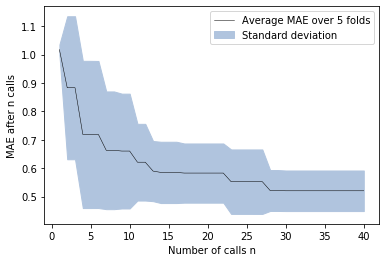

In [39]:
def plot_convergence(dataframe, n_calls):

    # x values
    x = list(range(1, n_calls + 1))
    
    # y values
    cumltv_MAE = [dataframe.loc[dataframe['Fold'] == fold, 'MAE/MAD'].tolist()
                   for fold in range(1, 6)]
    cumltv_MAE = list(zip(*cumltv_MAE))   
    y = [statistics.mean(call) for call in cumltv_MAE]
    
    # standard devation
    stdev = [statistics.stdev(call) for call in cumltv_MAE]
    
    # standard devation bounds
    y1 = [i - sd for i, sd in zip(y, stdev)]
    y2 = [i + sd for i, sd in zip(y, stdev)]
    
    # plot mean line
    line = plt.plot(x, 
             y, 
             color='black', 
             linewidth=0.5, 
                    label='Average MAE over 5 folds')
    
    # plot standard deviation bounds
    fill = plt.fill_between(x, 
                     y1, 
                     y2, 
                     fc='lightsteelblue', 
                            ec='lightsteelblue', 
                            label='Standard deviation')
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')

    plt.legend()


plot_convergence(cumulative_MAE_df, 40)

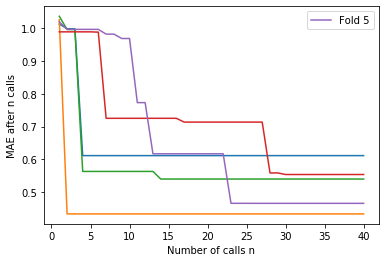

In [40]:
def plot_individual_convergence(dataframe, fold, n_calls):

    x = list(range(1, n_calls + 1))
    y = dataframe.loc[dataframe['Fold'] == fold]
    y = y['MAE/MAD'].tolist()

    line = plt.plot(x, y, label='Fold {}'.format(fold))
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')
    
    plt.legend(handles=line)


num_folds = range(1, 6)  # 5 folds
for fold in num_folds:
    plot_individual_convergence(cumulative_MAE_df, fold, 40)

## External testing

### Per SVR model

In [41]:
def svr_predict(model_num, test_set):

    with open(output_dr + '/fold_' + str(model_num) + '_SVM_model.svm', 'rb') as file:
        model = pickle.load(file)
    
    return model.predict(test_set)


def calc_mae(dataframe, model):

    model_df = dataframe.loc[dataframe['Model number'] == model]
    abs_err = model_df['Absolute error (kcal/mol)'].tolist()
    MAE = statistics.mean(abs_err)
    
    return MAE


# load in testing set
# note: test_df defined previously in section 5.3
test_ID = test_df.index
test_X = test_df.drop(columns='dGoffset (kcal/mol)').values
test_y = test_df['dGoffset (kcal/mol)'].values

# empty df for external testing results
test_rst = pd.DataFrame()

# peform prediction using each model
num_models = num_folds

for model in num_models:
    
    # call SVR prediction function
    svr_rst = svr_predict(model, test_X)
    
    # write results per fold into dictionary and load into df
    model_rst = {}
    model_rst['ID'] = test_ID
    model_rst['Model number'] = [model for i in range(41)]
    model_rst['Experimental dGoffset (kcal/mol)'] = test_y
    model_rst['Predcted dGoffset (kcal/mol)'] = svr_rst
    model_rst['Absolute error (kcal/mol)'] = abs(test_y - svr_rst)

    test_rst = pd.concat([test_rst, pd.DataFrame(model_rst)])


# calculate MAE values
MAE_lst = [calc_mae(test_rst, model) for model in num_models]
print('MAE values between experimental and predicted dGoffset values:\n')
for model, model_MAE in enumerate(MAE_lst):
    print('Model {} MAE: {} kcal/mol'.format(model + 1, round(model_MAE, 2)))
print('\nAverage MAE: {} kcal/mol'.format(round(statistics.mean(MAE_lst), 2)))


test_rst = test_rst.round(2)
test_rst

MAE values between experimental and predicted dGoffset values:

Model 1 MAE: 0.88 kcal/mol
Model 2 MAE: 0.85 kcal/mol
Model 3 MAE: 0.83 kcal/mol
Model 4 MAE: 1.01 kcal/mol
Model 5 MAE: 0.73 kcal/mol

Average MAE: 0.86 kcal/mol


,ID,Model number,Experimental dGoffset (kcal/mol),Predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_3802803,1,-0.06,-0.62,0.56
1,mobley_9897248,1,-2.18,-1.24,0.94
2,mobley_6195751,1,1.17,0.10,1.07
3,mobley_3359593,1,-1.13,-0.74,0.39
4,mobley_4371692,1,1.45,0.41,1.04
...,...,...,...,...,...
36,mobley_4587267,5,-5.46,-3.79,1.67
37,mobley_9741965,5,0.65,1.05,0.40
38,mobley_2972345,5,0.52,0.67,0.15
39,mobley_7913234,5,-1.84,-1.72,0.12


### Averaged over all models

In [81]:
# average predicted offset values
prdt_offsets = [test_rst.loc[test_rst['Model number'] == model, 'Predcted dGoffset (kcal/mol)'].tolist()
                   for model in num_models]
prdt_offsets = list(zip(*prdt_offsets))
avg_offsets = [statistics.mean(offset_set) for offset_set in prdt_offsets]

# write results to df
avg_rst = {}

avg_rst['ID'] = test_ID
avg_rst['Experimental dGoffset (kcal/mol)'] = test_y
avg_rst['Averaged predcted dGoffset (kcal/mol)'] = avg_offsets
avg_rst['Absolute error (kcal/mol)'] = abs(test_y - avg_offsets)

avg_rst_df = pd.DataFrame(avg_rst)

# MAE
print('MAE between experimental and averaged predicted dGoffsets:')
test_offset_MAE = round(statistics.mean(abs(test_y - avg_offsets)), 2)
print('MAE: {} kcal/mol'.format(test_offset_MAE))

avg_rst_df = avg_rst_df.round(2)
avg_rst_df

MAE between experimental and averaged predicted dGoffsets:
MAE: 0.83 kcal/mol


,ID,Experimental dGoffset (kcal/mol),Averaged predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_3802803,-0.06,-0.18,0.12
1,mobley_9897248,-2.18,-1.51,0.67
2,mobley_6195751,1.17,-0.23,1.40
3,mobley_3359593,-1.13,-0.36,0.77
4,mobley_4371692,1.45,0.34,1.11
5,mobley_7417968,0.44,0.13,0.31
6,mobley_1160109,-0.41,0.17,0.58
7,mobley_2316618,-0.61,1.43,2.04
8,mobley_3040612,-0.09,-0.36,0.27
9,mobley_4479135,-0.31,-0.02,0.29


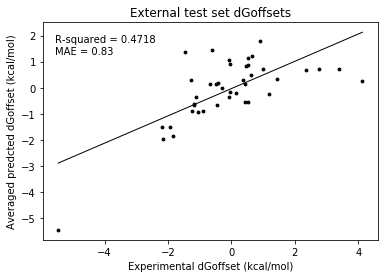

In [82]:
plot_scatter(avg_rst_df, 
        [1, 'Experimental dGoffset (kcal/mol)'], 
        [2, 'Averaged predcted dGoffset (kcal/mol)'], 
             title='External test set dGoffsets', 
             MAE=test_offset_MAE)

## Corrected hydration free energies

In [63]:
# SAMPL4 Gurthrie df
test_fs_df = freesolv_df.loc[freesolv_df.iloc[:, 7] == 'SAMPL4_Guthrie']

# experimental dGhydr
test_exp = test_fs_df.iloc[:, 3]

# calculated dGhydr
test_calc = test_fs_df.iloc[:, 5].tolist()

# calculated dGhydr uncertainty
test_calc_err = test_fs_df.iloc[:, 6].tolist()

# corrected calculated Ghydr using predicted dGoffsets
corr_calc = [calc + err for calc, err in zip(test_calc, avg_offsets)]

# calculated dGhydr absolute error
calc_AE = [abs(exp - calc) for exp, calc in zip(test_exp, test_calc)]

# corrected calculated dGhydr propogated absolute error
# corr_AE = (err1**2 + err2**2)**0.5
corr_AE = [abs(exp - calc) for exp, calc in zip(test_exp, corr_calc)]

# create df
corr_dict = {'ID': test_ID, 
             'Experimental dGhydr (kcal/mol)': test_exp, 
             'Calculated dGhydr (kcal/mol)': test_calc, 
             'Calculated dGhydr absolute error (kcal/mol)': calc_AE,  
             'Corrected calculated dGhydr (kcal/mol)': corr_calc, 
             'Corrected calculated dGhydr absolute error (kcal/mol)': corr_AE}

corr_df = pd.DataFrame(corr_dict).round(2)

# calculate MAEs
calc_MAE = statistics.mean(calc_AE)
print('Mobley calculated MAE: {} kcal/mol'.format(round(calc_MAE, 2)))
corr_MAE = statistics.mean(corr_AE)
print('Corrected calculated MAE: {} kcal/mol'.format(round(corr_MAE, 2)))

corr_df

Mobley calculated MAE: 1.17 kcal/mol
Corrected calculated MAE: 1.54 kcal/mol


,ID,Experimental dGhydr (kcal/mol),Calculated dGhydr (kcal/mol),Calculated dGhydr absolute error (kcal/mol),Corrected calculated dGhydr (kcal/mol),Corrected calculated dGhydr absolute error (kcal/mol)
10,mobley_3802803,-3.75,-3.34,0.41,-3.52,0.23
79,mobley_9897248,-9.34,-7.87,1.47,-9.38,0.04
98,mobley_6195751,-5.66,-4.77,0.89,-5.00,0.66
113,mobley_3359593,-14.21,-13.60,0.61,-13.96,0.25
123,mobley_4371692,-11.85,-15.25,3.40,-14.91,3.06
140,mobley_7417968,-5.33,-4.05,1.28,-3.92,1.41
141,mobley_1160109,-4.80,-5.32,0.52,-5.15,0.35
162,mobley_2316618,-4.68,-8.81,4.13,-7.38,2.70
173,mobley_3040612,-3.78,-4.30,0.52,-4.66,0.88
180,mobley_4479135,-0.85,-0.76,0.09,-0.78,0.07


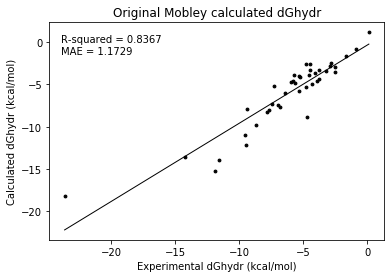

In [68]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [2, 'Calculated dGhydr (kcal/mol)'], 
             title='Original Mobley calculated dGhydr', 
             MAE=calc_MAE)

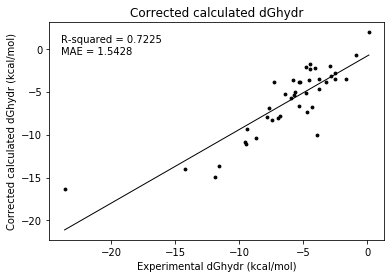

In [69]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [4, 'Corrected calculated dGhydr (kcal/mol)'], 
             title='Corrected calculated dGhydr', 
             MAE=corr_MAE)

## Determining high absolute errors

In [47]:
def draw_structure_panel(sdf_suppl, legend):
    'Draw RDKit.Draw in panel format.'

    suppl = [SDMolSupplier(sdf) for sdf in sdf_suppl]
    mols = [x[0] for x in suppl if x is not None]
    for mol in mols:
        tmp = AllChem.Compute2DCoords(mol)
    
    return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200), legends=legend)    

$$ \Delta{G_{offset}} = \Delta{G_{exp}} - \Delta{G_{calc}} $$
$$ \Rightarrow \Delta{G_{offset}} = \Delta{G_{corrected}} - \Delta{G_{calc}} $$
$$ \Rightarrow \Delta{G_{corrected}} = \Delta{G_{calc}} + \Delta{G_{offset}} $$

### Tanimoto Coefficient

$$ T_{a,b}=\frac{M_{a,b}}{M_{a}+M_{b}+M_{a,b}} $$
$$ M_{a}=single test set ligand 1D feature list $$
$$ M_{b}=validation set feature list $$
$$ M_{a,b}= $$

In [ ]:
# For each training/validation
#       for each test set molecule
#            compute distribution of Tanimoto to training and validation
#            Plot average distribution tanimoto test to training and compare average distrib validation to training
# Check for trends in training/validation correction improvements

# for fold in kfolds:
#     for training, validation in fold:
#         for test in test_set:
            

In [85]:
def tanimoto(list1, list2):
  intersection = [common_item for common_item in list1 if common_item in list2]
  return float(len(c))/(len(a) + len(b) - len(c))

In [83]:
# list of test SDF paths from section 5.3.2
new_test_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf
               for sdf in test_sdf]

corr_AE = corr_df.iloc[:, 5].tolist()
corr_AE = [str(x) for x in corr_AE]

# draw_structure_panel(new_test_sdf, corr_AE)

### Absolute error < 1.00

23 structures have dGhydr absolute erros < 1.00 kcal/mol


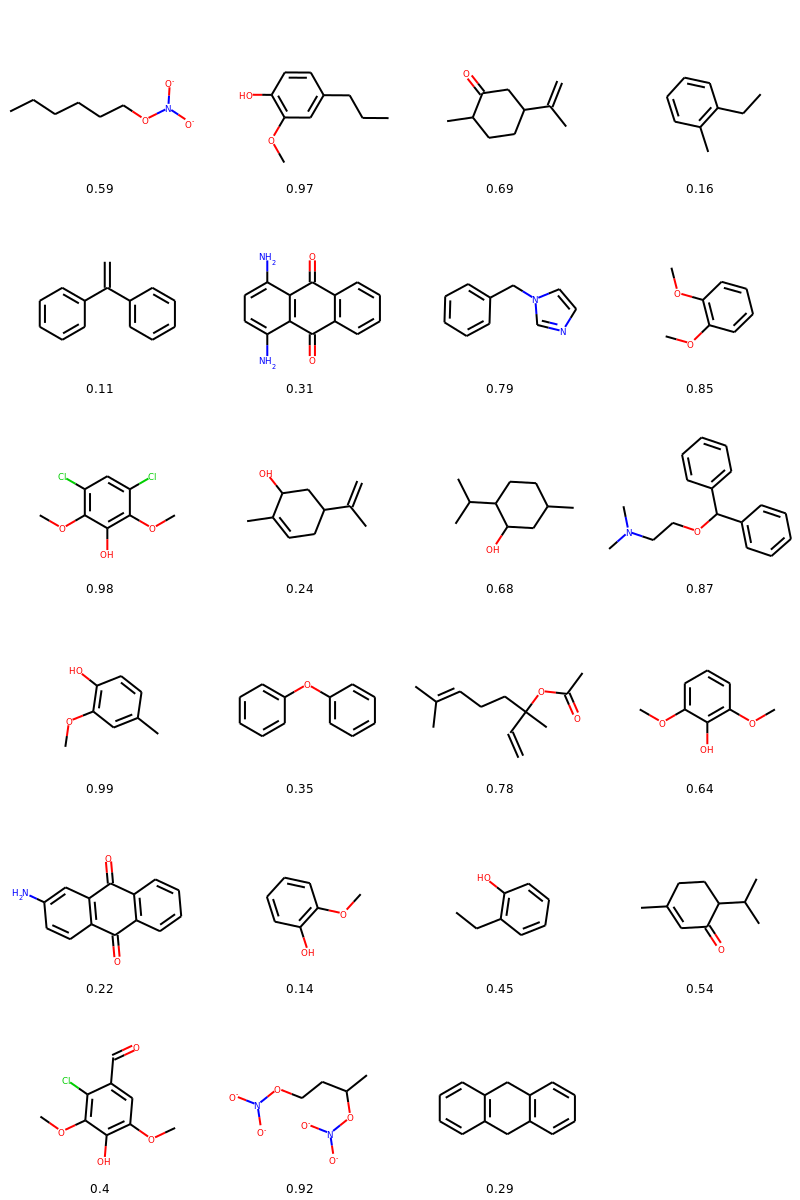

In [49]:
# df containing entries with corrected calculated dGhydr absolute errors < 1.00
below_one_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 1.00]

# sdf paths
below_one_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in below_one_df['ID']]

# Actual absolute error values
below_one_AE = [str(x) for x in below_one_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(below_one_df), 'structures have dGhydr absolute erros < 1.00 kcal/mol')
draw_structure_panel(below_one_sdf, below_one_AE)

### 1.00 < absolute error < 2.00

8 structures have dGhydr 1.00 < absolute erros < 2.00 kcal/mol


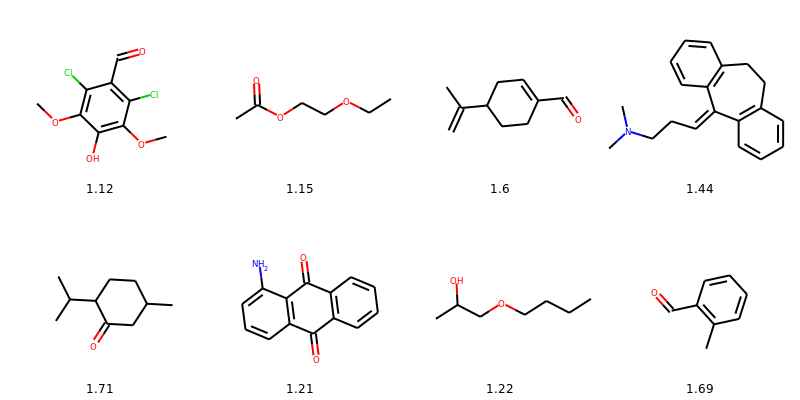

In [50]:
# df containing entries with corrected calculated dGhydr 1.00 < absolute errors < 2.00
between_1and2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 2.00]
between_1and2_df = between_1and2_df.loc[between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 1.00]

# sdf paths
between_1and2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in between_1and2_df['ID']]

# Actual absolute error values
between_1and2_AE = [str(x) for x in between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(between_1and2_df), 'structures have dGhydr 1.00 < absolute erros < 2.00 kcal/mol')
draw_structure_panel(between_1and2_sdf, between_1and2_AE)

### Absolute error > 2.00

10 structures have dGhydr absolute erros > 2.00 kcal/mol


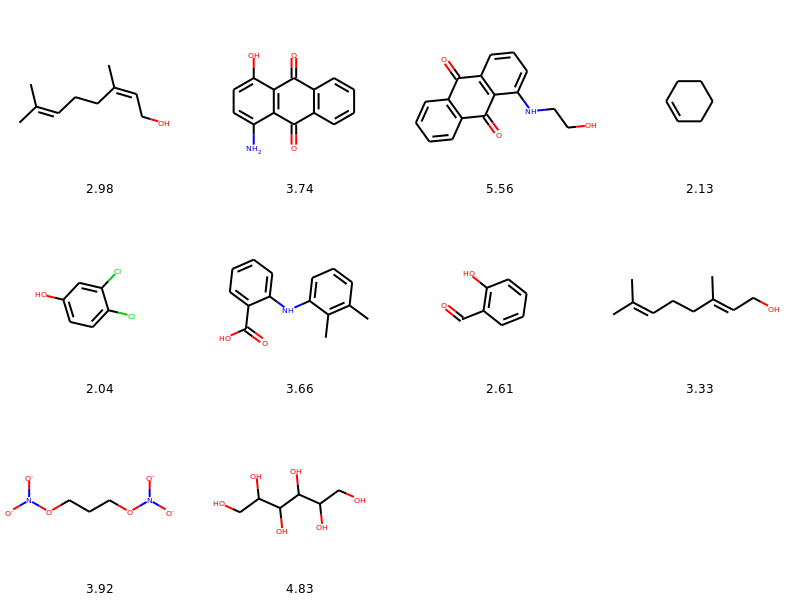

In [51]:
# df containing entries with corrected calculated dGhydr absolute errors > 2.00
above_2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 2.00]

# sdf paths
above_2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in above_2_df['ID']]

# Actual absolute error values
above_2_AE = [str(x) for x in above_2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(above_2_df), 'structures have dGhydr absolute erros > 2.00 kcal/mol')
draw_structure_panel(above_2_sdf, above_2_AE)